# Assignment 2: Machine Learning Excercise
### Anna Mattessich
The Abalone dataset from the UCI Machine Learning Repository is a classic dataset used for predicting the age of abalones (a type of marine snail) from physical measurements. The age of an abalone is determined by cutting the shell, staining it, and counting the number of rings through a microscope—a time-consuming and somewhat subjective process. The aim with this dataset is typically to predict the number of rings (which correlates with age) based on other easily measured features.

### Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import scipy.stats as stats 
import itertools

### Part 1: Download Data
Using the Abolone Dataset from the UCI Machine Learning Repository

In [2]:
##Get dataset from URL
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
df = pd.read_csv(url, names=names)
##Rename as df for simplicity 
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Part 2: Explore Data
Perform exploratory data analysis (EDA) to understand the distribution of each feature and the target variable (Rings).

Handle the nominal feature 'Sex' using one-hot encoding or label encoding, as linear regression models require numerical input features.

Check for missing values or outliers, especially in the 'Height' feature, where zero values might indicate erroneous data.

In [3]:
##Statistics Summary
stats = df.describe()
print(stats)

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

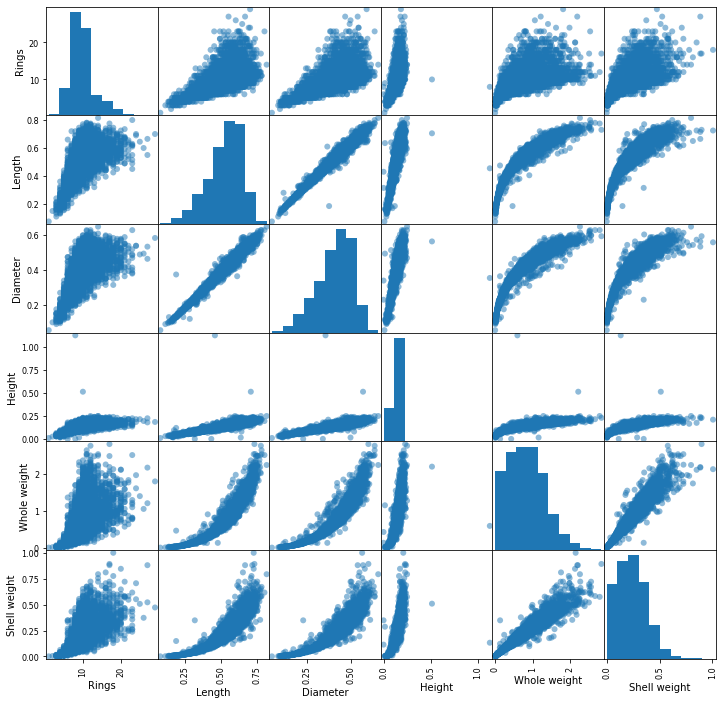

In [4]:
# Select relevant columns
df1 = df[["Rings", "Length", "Diameter", "Height", "Whole weight", "Shell weight", "Sex"]]

# Plot pairplot
pd.plotting.scatter_matrix(df1, figsize=(12, 12), diagonal='hist', marker='o', grid=True)
plt.show()


In [5]:
##Sex dataframe 
##Only keep rows with valid Sex values
df_valid = df[df['Sex'].isin(['M','F','I'])] 

##One-hot encode the Sex column
df_encoded = pd.get_dummies(df_valid, columns=['Sex'])

##Rename the one-hot encoded columns
df_encoded = df_encoded.rename(columns={'Sex_M': 'Sex_male', 'Sex_F': 'Sex_female', 'Sex_I': 'Sex_infant'})

##Proceed with further analysis or modeling using the updated DataFrame df_encoded
df_encoded.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_female,Sex_infant,Sex_male
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


In [6]:
##Info Summary, look for Null Valies
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
##Identify Outliers
height_mean = df_encoded['Height'].mean()
height_stddev = df_encoded['Height'].std()
z_scores = []
for _, row in df_encoded.iterrows():
    z_scores.append((row['Height'] - height_mean) / height_stddev)

outlier_indices = [idx for idx, val in enumerate(z_scores) if abs(val) > 2.5]
print("Outlier Indices:\n{}".format(outlier_indices))

outlier_data = df.iloc[outlier_indices]
print("\nOriginal Height Values for Outlier Samples:\n{}".format(outlier_data['Height']))

Outlier Indices:
[236, 237, 238, 306, 694, 719, 720, 1174, 1257, 1417, 1428, 1763, 1987, 2051, 2169, 2171, 2172, 2179, 2381, 2711, 3190, 3902, 3996]

Original Height Values for Outlier Samples:
236     0.010
237     0.030
238     0.030
306     0.030
694     0.020
719     0.025
720     0.025
1174    0.015
1257    0.000
1417    0.515
1428    0.250
1763    0.250
1987    0.025
2051    1.130
2169    0.015
2171    0.030
2172    0.030
2179    0.250
2381    0.025
2711    0.030
3190    0.025
3902    0.020
3996    0.000
Name: Height, dtype: float64


In [8]:
##Remove outliers
df_no_outliers = df.loc[~df.index.isin(outlier_indices)]
print("Original DataFrame Shape:", df.shape)
print("DataFrame Without Outliers Shape:", df_no_outliers.shape)

Original DataFrame Shape: (4177, 9)
DataFrame Without Outliers Shape: (4154, 9)


### Part 3: Feature Engineering 
Consider creating new features that might help in prediction, such as the ratios between different physical measurements.

Evaluate if any non-linear transformations, such as logarithmic or polynomial features, might improve the model's performance. 

In [9]:
##New Feature
# Create ratio features
df['Length_to_Diameter_ratio'] = df['Length'] / df['Diameter']
df['Shell_to_Whole_weight_ratio'] = df['Shell weight'] / df['Whole weight']
df['Shell_to_Viscera_weight_ratio'] = df['Shell weight'] / df['Viscera weight']

# Display the first few rows of the DataFrame to verify the new features
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Length_to_Diameter_ratio,Shell_to_Whole_weight_ratio,Shell_to_Viscera_weight_ratio
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.246575,0.291829,1.485149
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1.320755,0.310421,1.443299
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.261905,0.310192,1.484099
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1.205479,0.300388,1.359649
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1.294118,0.268293,1.392405


Mean Squared Error (Linear Regression): 5.055541144299383


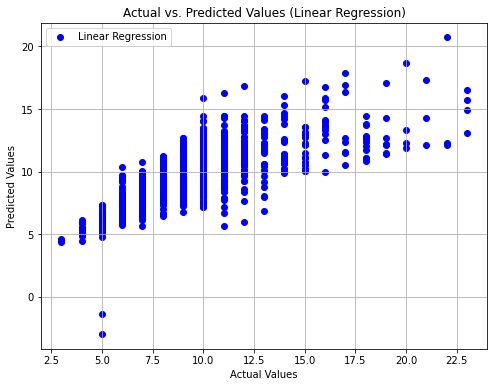

Mean Squared Error (Polynomial Regression): 5.0156426359984


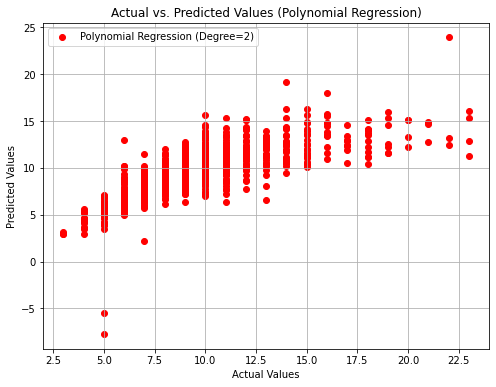

In [10]:
##Non-Linear Transformations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Select continuous features
continuous_features = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]

# Split the dataset into features and target variable
X = df[continuous_features]
y = df['Rings']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
predictions = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, predictions)
print("Mean Squared Error (Linear Regression):", mse_lr)

# Plot the predicted vs. actual values for linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Try polynomial features
degree = 2  # Degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
predictions_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, predictions_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

# Plot the predicted vs. actual values for polynomial regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_poly, color='red', label='Polynomial Regression (Degree=2)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

### Part 4: Model Development
Split the data into training and testing sets.

Start with a simple linear regression model, then explore more complex models or add polynomial features to capture non-linear relationships.

In [11]:
# Libraries Necessary for following
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.base import BaseEstimator, TransformerMixin


# Features - excluding ring
X = df_encoded.drop('Rings', axis=1)  
# Target variable
y = df_encoded['Rings']               
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert X_test and y_test to numpy arrays
X_test = X_test.values
y_test = y_test.values

import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", message="X does not have valid feature names, but PolynomialFeatures was fitted with feature names")
warnings.filterwarnings("ignore", message="X does not have valid feature names, but LinearRegression was fitted with feature names")


Linear Regression Model

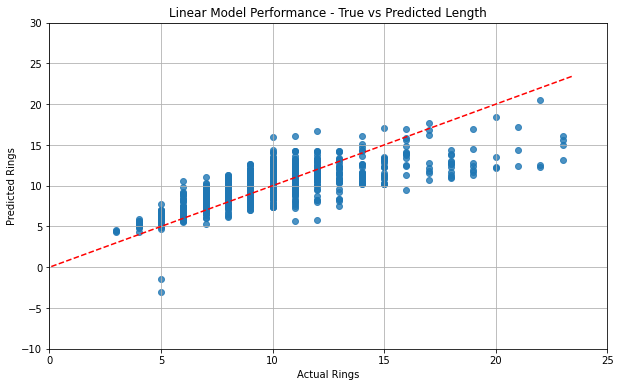


Linear Regression Model Results:
Score (r^2): 0.5482
Mean Absolute Error: 1.5931067816608344
Mean Squared Error: 4.891232447128562
Root Mean Squared Error: 2.2116130871218327


In [12]:
# Train the linear regression model
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

# Make predictions of X_test
predictions_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, predictions_lr)
mse_lr = mean_squared_error(y_test, predictions_lr)
rmse_lr = np.sqrt(mse_lr)
lr_score = lr_model.score(X_test, y_test)

# Graph for linear regression
def draw_identity_line(ax):
    lim = max([np.max(np.abs(y_test)), np.max(np.abs(predictions_lr))]) * 1.02
    ax.plot([-lim, lim], [-lim, lim], c='red', linestyle='--')

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test, predictions_lr, alpha=0.8)
draw_identity_line(ax)
ax.set_xlabel('Actual Rings')
ax.set_ylabel('Predicted Rings')
ax.set_ylim(-10, 30)
ax.set_xlim(0, 25)
ax.set_title('Linear Model Performance - True vs Predicted Length')
plt.grid()
plt.show()

print("\nLinear Regression Model Results:")
print("Score (r^2):", round(lr_score, 4))
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)


Polynomial Model

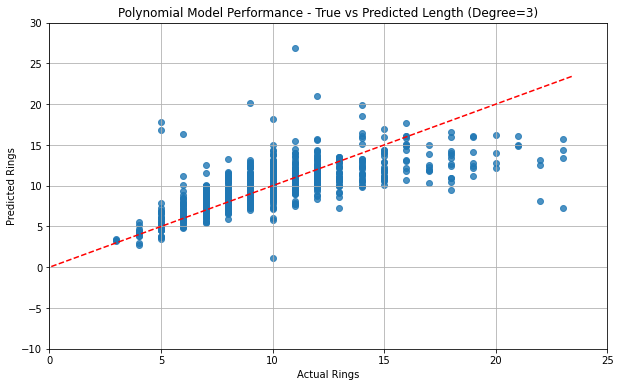


Polynomial Regression Model Results:
Score (r^2): 0.4258
Mean Absolute Error: 1.640635768000096
Mean Squared Error: 6.216044915534391
Root Mean Squared Error: 2.4931997343843895


In [13]:
# Define the pipeline with PolynomialFeatures
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions_pr = pipeline.predict(X_test)

# Evaluate the model
mae_pr = mean_absolute_error(y_test, predictions_pr)
mse_pr = mean_squared_error(y_test, predictions_pr)
rmse_pr = np.sqrt(mse_pr)
r2_pr = r2_score(y_test, predictions_pr)

# Graph for polynomial regression
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test, predictions_pr, alpha=0.8)
draw_identity_line(ax)
ax.set_xlabel('Actual Rings')
ax.set_ylabel('Predicted Rings')
ax.set_ylim(-10, 30)
ax.set_xlim(0, 25)
ax.set_title('Polynomial Model Performance - True vs Predicted Length (Degree=3)')
plt.grid()
plt.show()

print("\nPolynomial Regression Model Results:")
print("Score (r^2):", round(r2_pr, 4))
print("Mean Absolute Error:", mae_pr)
print("Mean Squared Error:", mse_pr)
print("Root Mean Squared Error:", rmse_pr)

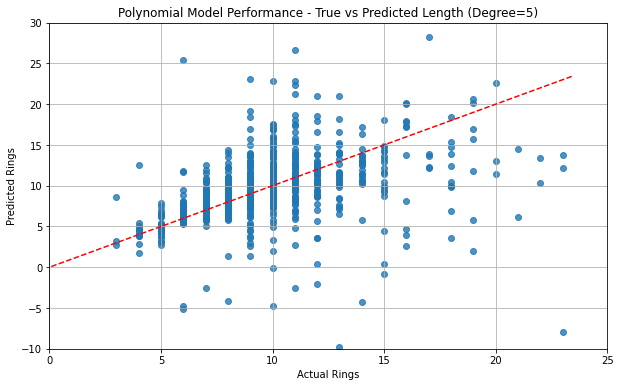


Polynomial Regression Model Results (Degree=5):
Score (r^2): -13753.6973
Mean Absolute Error: 41.43138690833423
Mean Squared Error: 148897.4875447666
Root Mean Squared Error: 385.87237209311394


In [14]:
# Define the pipeline with PolynomialFeatures
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=5)),
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions_pr = pipeline.predict(X_test)

# Evaluate the model
mae_pr = mean_absolute_error(y_test, predictions_pr)
mse_pr = mean_squared_error(y_test, predictions_pr)
rmse_pr = np.sqrt(mse_pr)
r2_pr = r2_score(y_test, predictions_pr)

# Graph for polynomial regression
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test, predictions_pr, alpha=0.8)
draw_identity_line(ax)
ax.set_xlabel('Actual Rings')
ax.set_ylabel('Predicted Rings')
ax.set_ylim(-10, 30)
ax.set_xlim(0, 25)
ax.set_title('Polynomial Model Performance - True vs Predicted Length (Degree=5)')
plt.grid()
plt.show()

print("\nPolynomial Regression Model Results (Degree=5):")
print("Score (r^2):", round(r2_pr, 4))
print("Mean Absolute Error:", mae_pr)
print("Mean Squared Error:", mse_pr)
print("Root Mean Squared Error:", rmse_pr)


Extremely negative r^2 indicates that this is overfit to the function and no longer accurate when to the degree=5.

So far the linear regression has been best (has had the highest r^2), lets check that degree=2 is not better than the linear model.

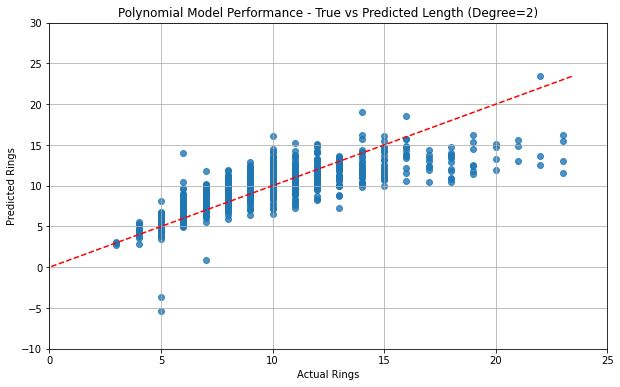


Polynomial Regression Model Results:
Score (r^2): 0.5538
Mean Absolute Error: 1.5384645096330567
Mean Squared Error: 4.829968938736276
Root Mean Squared Error: 2.1977190308900445


In [15]:
# Define the pipeline with PolynomialFeatures
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions_pr = pipeline.predict(X_test)

# Evaluate the model
mae_pr = mean_absolute_error(y_test, predictions_pr)
mse_pr = mean_squared_error(y_test, predictions_pr)
rmse_pr = np.sqrt(mse_pr)
r2_pr = r2_score(y_test, predictions_pr)

# Graph for polynomial regression
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test, predictions_pr, alpha=0.8)
draw_identity_line(ax)
ax.set_xlabel('Actual Rings')
ax.set_ylabel('Predicted Rings')
ax.set_ylim(-10, 30)
ax.set_xlim(0, 25)
ax.set_title('Polynomial Model Performance - True vs Predicted Length (Degree=2)')
plt.grid()
plt.show()

print("\nPolynomial Regression Model Results:")
print("Score (r^2):", round(r2_pr, 4))
print("Mean Absolute Error:", mae_pr)
print("Mean Squared Error:", mse_pr)
print("Root Mean Squared Error:", rmse_pr)

The degree=2 shows the highest r^2 out of all the above models. 

### Part 5: Bias-Variance Trade-off Analysis

Analyze the model's performance to understand if it's suffering from high bias (underfitting) or high variance (overfitting).

Adjust the model complexity accordingly, by adding or removing features or using regularization techniques.

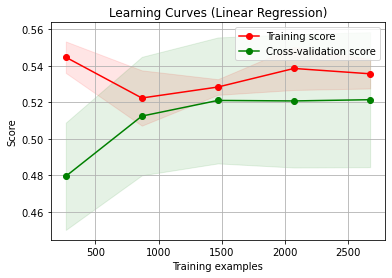

In [16]:
##Learning curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (Linear Regression)"
cv = 5  # Cross-validation folds
plot_learning_curve(lr_model, title, X_train, y_train, cv=cv)
plt.show()

#### Looking at this graph
Underfitting: Both curves are close together at a low score.

Overfitting: There's a large gap between the curves, with the training score substantially higher than the cross-validation score.

This graph shows the linear regression is underfitting, as the lines are close together near a r^2 of 0.52 which is low.

In [17]:
from sklearn.model_selection import cross_val_score

# Define the model (e.g., Linear Regression)
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)

Cross-Validation Scores: [0.4287186  0.19135949 0.49237719 0.51879523 0.44955174]
Mean CV Score: 0.41616044882463876
Standard Deviation of CV Scores: 0.11674848757357488


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define the polynomial regression model with degree=2
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Perform cross-validation with the polynomial regression model
poly_cv_scores = cross_val_score(poly_model, X, y, cv=5)

# Print the cross-validation scores
print("Polynomial Regression CV Scores:", poly_cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_poly_cv_score = np.mean(poly_cv_scores)
std_poly_cv_score = np.std(poly_cv_scores)
print("Mean Polynomial Regression CV Score:", mean_poly_cv_score)
print("Standard Deviation of Polynomial Regression CV Scores:", std_poly_cv_score)


Polynomial Regression CV Scores: [ 0.47115695  0.33169002 -0.38156843  0.56125003  0.47818886]
Mean Polynomial Regression CV Score: 0.292143484215376
Standard Deviation of Polynomial Regression CV Scores: 0.34482711754835005


Based on these observations, we can conclude that the polynomial regression model with a degree of 2 performs worse than the linear regression model for this dataset.

In [19]:
from sklearn.linear_model import Lasso

# Define the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Starting alpha

# Perform cross-validation with the Lasso regression model
lasso_cv_scores = cross_val_score(lasso_model, X, y, cv=5)

# Print the cross-validation scores
print("Lasso Regression CV Scores:", lasso_cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_lasso_cv_score = np.mean(lasso_cv_scores)
std_lasso_cv_score = np.std(lasso_cv_scores)
print("Mean Lasso Regression CV Score:", mean_lasso_cv_score)
print("Standard Deviation of Lasso Regression CV Scores:", std_lasso_cv_score)


Lasso Regression CV Scores: [ 0.07531226 -0.171062    0.27734624  0.3177494   0.26228424]
Mean Lasso Regression CV Score: 0.15232602897672445
Standard Deviation of Lasso Regression CV Scores: 0.18198719449336115


Worse than linear regression and polynomial by a lot.

Try adjusting the alpha

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the range of alpha values to search
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0] 

# Create a dictionary containing the alpha values
param_grid = {'alpha': alpha_values}

# Create a GridSearchCV object
grid_search = GridSearchCV(Lasso(), param_grid, cv=7)

# Perform grid search
grid_search.fit(X, y)

# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)


Best alpha: 0.001


In [21]:
# Define the Lasso regression model
lasso_model = Lasso(alpha=0.001)  # Adjusted alpha

# Perform cross-validation with the Lasso regression model
lasso_cv_scores = cross_val_score(lasso_model, X, y, cv=5)

# Print the cross-validation scores
print("Lasso Regression CV Scores:", lasso_cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_lasso_cv_score = np.mean(lasso_cv_scores)
std_lasso_cv_score = np.std(lasso_cv_scores)
print("Mean Lasso Regression CV Score:", mean_lasso_cv_score)
print("Standard Deviation of Lasso Regression CV Scores:", std_lasso_cv_score)


Lasso Regression CV Scores: [0.41975928 0.21183058 0.50373648 0.52295338 0.45057757]
Mean Lasso Regression CV Score: 0.4217714556262056
Standard Deviation of Lasso Regression CV Scores: 0.11123404186085735


The Lasso regression model achieves a slightly higher mean cross-validation score compared to the linear regression model. Additionally, the standard deviation of the cross-validation scores for the Lasso regression model with optimized alpha is lower, indicating more stable performance across different folds.